<h1><center>Customer Churn Prediction</center></h1>

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
# Reading historical dataset of telecommunication company using pandas
df=pd.read_csv('data.csv')
df.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65         820.5   Yes  
6    Credit card (automatic)          89.10        1949.4    No  
7               Mailed check          29.75         301.9    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
df.describe(include='object')

customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     6797-UCJHZ   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq          3473        2810            2785            3875   

       PaperlessBilling     PaymentMethod TotalCharges Churn  
count              7043              7043         7043  7043  
unique                2                 4         6531     2  
top                 Yes  Electronic check                 No  
freq               4171              2365           11  5174

In [5]:
df.shape

(7043, 21)

# Exploratory Data Analysis 

In [6]:
# Checking Missing Values in our dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# exploring target variable 
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [8]:
# Creating a list of binary columns present in our dataset
bin_col=[]
col=df.columns

In [9]:
for column in col:
    if df[column].value_counts().shape[0]==2:
        bin_col.append(column)

In [10]:
# viewing binary columns 
bin_col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
# creating a list for multiple categorical columns 
cat_multi_col=['MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']

Exploring Categorical features

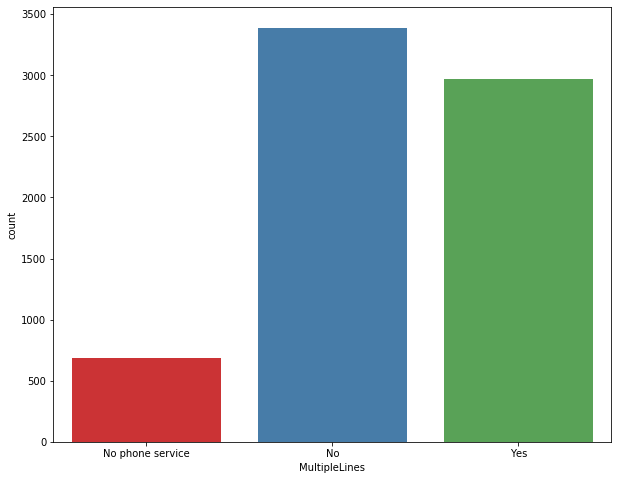

In [13]:
plt.figure(figsize=(10,8))
sns.countplot('MultipleLines',data=df,palette='Set1')

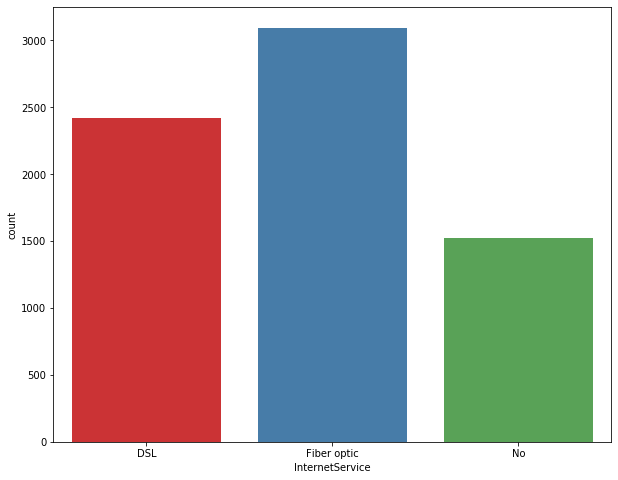

In [14]:
plt.figure(figsize=(10,8))
sns.countplot('InternetService',data=df,palette='Set1')

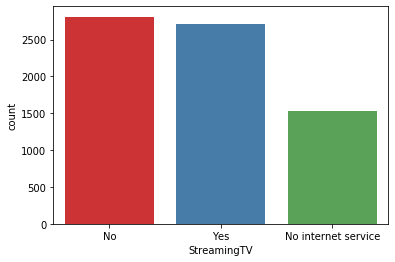

In [15]:
sns.countplot('StreamingTV',data=df,palette='Set1')

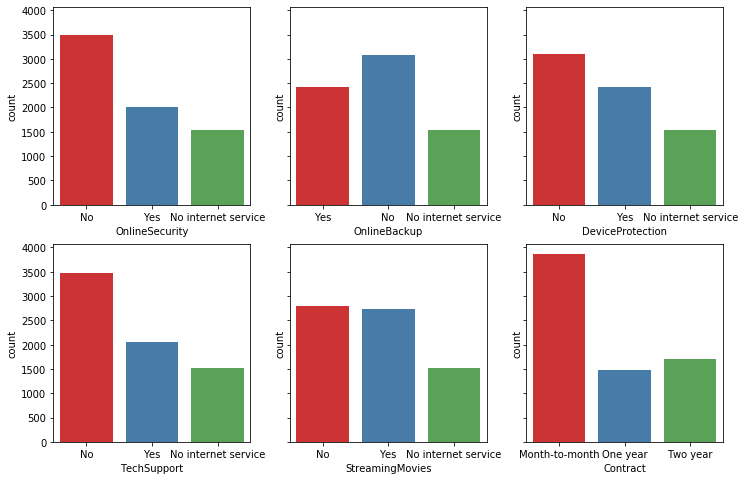

In [16]:
fig,axes=plt.subplots(2,3,figsize=(12,8),sharey=True)
sns.countplot('OnlineSecurity',data=df,palette='Set1',ax=axes[0,0])
sns.countplot('OnlineBackup',data=df,palette='Set1',ax=axes[0,1])
sns.countplot('DeviceProtection',data=df,palette='Set1',ax=axes[0,2])
sns.countplot('TechSupport',data=df,palette='Set1',ax=axes[1,0])
sns.countplot('StreamingMovies',data=df,palette='Set1',ax=axes[1,1])
sns.countplot('Contract',data=df,palette='Set1',ax=axes[1,2])

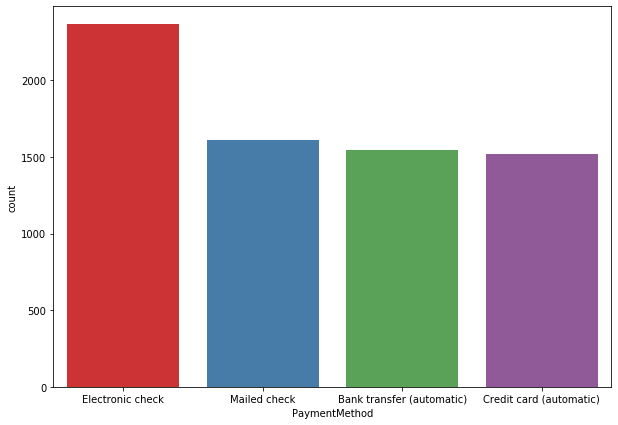

In [17]:
plt.figure(figsize=(10,7))
sns.countplot('PaymentMethod',data=df,palette='Set1')

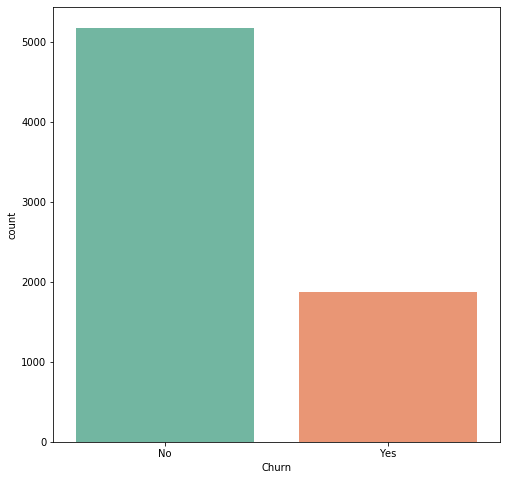

In [18]:
#Binary Columns
plt.figure(figsize=(8,8))
sns.countplot('Churn',data=df,palette='Set2')

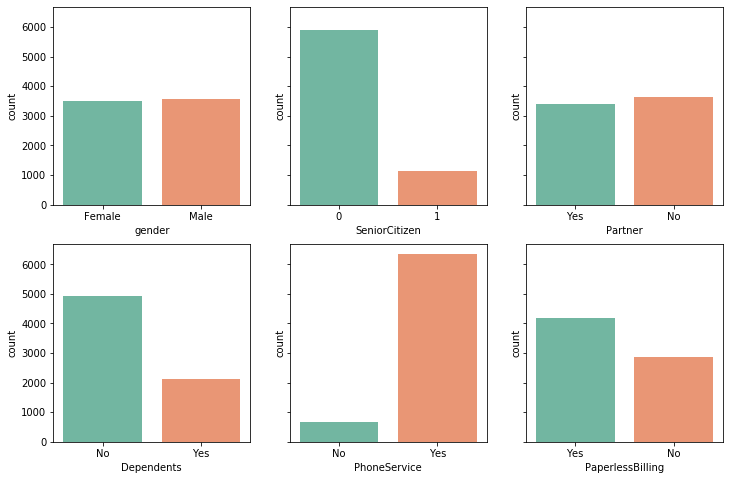

In [19]:
fig,axes=plt.subplots(2,3,figsize=(12,8),sharey=True)
sns.countplot('gender',data=df,palette='Set2',ax=axes[0,0])
sns.countplot('SeniorCitizen',data=df,palette='Set2',ax=axes[0,1])
sns.countplot('Partner',data=df,palette='Set2',ax=axes[0,2])
sns.countplot('Dependents',data=df,palette='Set2',ax=axes[1,0])
sns.countplot('PhoneService',data=df,palette='Set2',ax=axes[1,1])
sns.countplot('PaperlessBilling',data=df,palette='Set2',ax=axes[1,2])

In [20]:
# converting churn value to numeric 1's an 0's
churn_numeric = {'Yes':1, 'No':0}
df.Churn.replace(churn_numeric, inplace=True)

<b>Analyzing Churn Rate with different Categorical Features </b>

In [21]:
df[['gender','Churn']].groupby(['gender']).mean()

Churn
gender          
Female  0.269209
Male    0.261603

In [22]:
df[['SeniorCitizen','Churn']].groupby(['SeniorCitizen']).mean()

Churn
SeniorCitizen          
0              0.236062
1              0.416813

In [23]:
df[['Partner','Churn']].groupby(['Partner']).mean()

Churn
Partner          
No       0.329580
Yes      0.196649

In [24]:
df[['Dependents','Churn']].groupby(['Dependents']).mean()

Churn
Dependents          
No          0.312791
Yes         0.154502

In [25]:
df[['PhoneService','Churn']].groupby(['PhoneService']).mean()

Churn
PhoneService          
No            0.249267
Yes           0.267096

In [26]:
df[['PaperlessBilling','Churn']].groupby(['PaperlessBilling']).mean()

Churn
PaperlessBilling          
No                0.163301
Yes               0.335651

In [27]:
df[['InternetService','Churn']].groupby(['InternetService']).mean()

Churn
InternetService          
DSL              0.189591
Fiber optic      0.418928
No               0.074050

In [28]:
df[['MultipleLines','Churn']].groupby(['MultipleLines']).mean()

Churn
MultipleLines             
No                0.250442
No phone service  0.249267
Yes               0.286099

In [29]:
df[['StreamingTV','Churn']].groupby(['StreamingTV']).mean()

Churn
StreamingTV                  
No                   0.335231
No internet service  0.074050
Yes                  0.300702

In [30]:
df[['StreamingMovies','Churn']].groupby(['StreamingMovies']).mean()

Churn
StreamingMovies              
No                   0.336804
No internet service  0.074050
Yes                  0.299414

In [31]:
df[['TechSupport','Churn']].groupby(['TechSupport']).mean()

Churn
TechSupport                  
No                   0.416355
No internet service  0.074050
Yes                  0.151663

In [32]:
df[['OnlineSecurity','Churn']].groupby(['OnlineSecurity']).mean()

Churn
OnlineSecurity               
No                   0.417667
No internet service  0.074050
Yes                  0.146112

In [33]:
df[['OnlineBackup','Churn']].groupby(['OnlineBackup']).mean()

Churn
OnlineBackup                 
No                   0.399288
No internet service  0.074050
Yes                  0.215315

In [34]:
df[['PaymentMethod','Churn']].groupby(['PaymentMethod']).mean()

Churn
PaymentMethod                      
Bank transfer (automatic)  0.167098
Credit card (automatic)    0.152431
Electronic check           0.452854
Mailed check               0.191067

In [35]:
df[['DeviceProtection','Churn']].groupby(['DeviceProtection']).mean()

Churn
DeviceProtection             
No                   0.391276
No internet service  0.074050
Yes                  0.225021

In [36]:
df[['Contract','Churn']].groupby(['Contract']).mean()

Churn
Contract                
Month-to-month  0.427097
One year        0.112695
Two year        0.028319

<b>Analyzing Churn Rate with Continous variable</b>

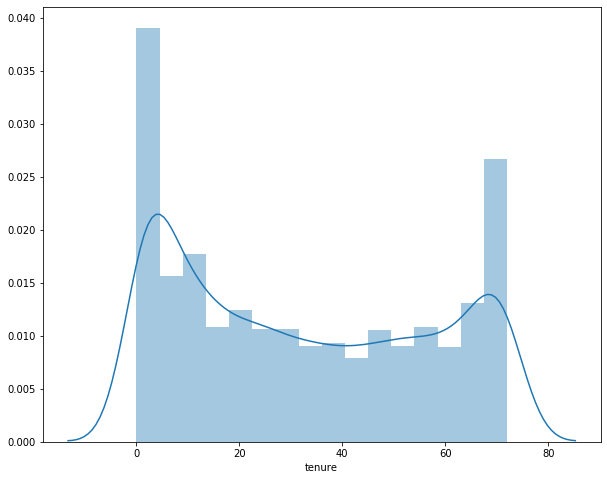

In [37]:
plt.figure(figsize=(10,8))
sns.distplot(df['tenure'])

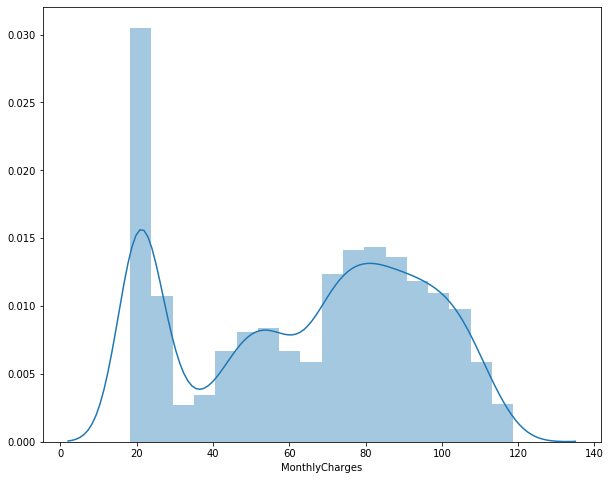

In [38]:
plt.figure(figsize=(10,8))
sns.distplot(df['MonthlyCharges'])

As we can see above continous variable data is not continous and we need to normalize it 

In [39]:
df[['MonthlyCharges','tenure','Churn']].groupby(['Churn']).mean()

MonthlyCharges     tenure
Churn                           
0           61.265124  37.569965
1           74.441332  17.979133

In [40]:
# Dropping column which are not adding much to churn rate
df.drop(['gender','PhoneService','customerID','Contract','TotalCharges'],axis=1,inplace=True)

In [41]:
df.head(10)

SeniorCitizen Partner Dependents  tenure     MultipleLines InternetService  \
0              0     Yes         No       1  No phone service             DSL   
1              0      No         No      34                No             DSL   
2              0      No         No       2                No             DSL   
3              0      No         No      45  No phone service             DSL   
4              0      No         No       2                No     Fiber optic   
5              0      No         No       8               Yes     Fiber optic   
6              0      No        Yes      22               Yes     Fiber optic   
7              0      No         No      10  No phone service             DSL   
8              0     Yes         No      28               Yes     Fiber optic   
9              0      No        Yes      62                No             DSL   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   
5             No           No              Yes          No         Yes   
6             No          Yes               No          No         Yes   
7            Yes           No               No          No          No   
8             No           No              Yes         Yes         Yes   
9            Yes          Yes               No          No          No   

  StreamingMovies PaperlessBilling              PaymentMethod  MonthlyCharges  \
0              No              Yes           Electronic check           29.85   
1              No               No               Mailed check           56.95   
2              No              Yes               Mailed check           53.85   
3              No               No  Bank transfer (automatic)           42.30   
4              No              Yes           Electronic check           70.70   
5             Yes              Yes           Electronic check           99.65   
6              No              Yes    Credit card (automatic)           89.10   
7              No               No               Mailed check           29.75   
8             Yes              Yes           Electronic check          104.80   
9              No               No  Bank transfer (automatic)           56.15   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1  
5      1  
6      0  
7      0  
8      1  
9      0

In [46]:
df.dtypes

SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                 int64
dtype: object

## Data Preprocessing 

In [43]:
# Converting Categorical features into numerical features
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [48]:
cat_feat=['SeniorCitizen','Partner','Dependents','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
          'StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod',]
X=pd.get_dummies(df,columns=cat_feat,drop_first=True)

In [50]:
X.columns

Index(['tenure', 'MonthlyCharges', 'Churn', 'SeniorCitizen_1', 'Partner_Yes',
       'Dependents_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [51]:
# Normalizing Continous variables 
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
a=mms.fit_transform(df[['tenure']])
b=mms.fit_transform(df[['MonthlyCharges']])

In [52]:
X['tenure']=a
X['MonthlyCharges']=b

In [54]:
X.shape

(7043, 26)

In [55]:
X.head()

tenure  MonthlyCharges  Churn  SeniorCitizen_1  Partner_Yes  \
0  0.013889        0.115423      0                0            1   
1  0.472222        0.385075      0                0            0   
2  0.027778        0.354229      1                0            0   
3  0.625000        0.239303      0                0            0   
4  0.027778        0.521891      1                0            0   

   Dependents_Yes  MultipleLines_No phone service  MultipleLines_Yes  \
0               0                               1                  0   
1               0                               0                  0   
2               0                               0                  0   
3               0                               1                  0   
4               0                               0                  0   

   InternetService_Fiber optic  InternetService_No  ...  \
0                            0                   0  ...   
1                            0                   0  ...   
2                            0                   0  ...   
3                            0                   0  ...   
4                            1                   0  ...   

   TechSupport_No internet service  TechSupport_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                1   
4                                0                0   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                     1                                      0   
1                     0                                      0   
2                     1                                      0   
3                     0                                      0   
4                     1                                      0   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                               1                           0  
1                               0                           1  
2                               0                           1  
3                               0                           0  
4                               1                           0  

[5 rows x 26 columns]

In [56]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [57]:
# As we can see above that we don't have that much data of Churn Yes So we will be doing resampling
X_0=X[X['Churn']==0]
X_1=X[X['Churn']==1]

In [59]:
print(len(X_0),len(X_1))

5174 1869


In [62]:
X_1_upsample=X_1.sample(n=len(X_0),replace=True,random_state=42)
print(len(X_1_upsample))

5174


In [63]:
X_upsample=X_0.append(X_1_upsample).reset_index(drop=True)

In [64]:
X_upsample['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

## Model Building

In [65]:
# Creating target variable and independent variables
from sklearn.model_selection import train_test_split
X=X_upsample.drop(['Churn'],axis=1)
y=X_upsample['Churn']

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<h3>KNN Classifier</h3>

In [67]:
from sklearn.neighbors import KNeighborsClassifier
k=4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [68]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [69]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8781106547475236
Test set Accuracy:  0.7864734299516908


In [78]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[1,2,3,4,5,6,8,9]}
knn = KNeighborsClassifier()
clf = GridSearchCV(estimator=knn, param_grid=parameters, n_jobs=-1, cv=5)

In [79]:
clf.fit(X, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [76]:
clf.best_params_

{'n_neighbors': 2}

In [80]:
clf.best_score_

0.8666408967916506

<h3>Random Forest Classifier</h3>

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [82]:
rfc=RandomForestClassifier(n_estimators=100,max_depth=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [83]:
pred=rfc.predict(X_test)

In [85]:
accuracy_score(y_test,pred)

0.8410628019323672

In [94]:
parameters = {'n_estimators':[150,200,250,300,350],'max_depth':[15,20,25,30,35,40]}
RFC = RandomForestClassifier()
clf = GridSearchCV(estimator=RFC, param_grid=parameters, n_jobs=-1, cv=7)

In [95]:
clf.fit(X,y)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [96]:
clf.best_params_

{'max_depth': 35, 'n_estimators': 250}

In [97]:
clf.best_score_

0.9058755315036722

In [ ]:
rfc_improved=RandomForestClassifier(n_estimators=250,max_depth=35)
rfc_improved.fit(X_train,y_train)

In [ ]:
pred_improved=rfc_improved.predict(X_test)